In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('value', ascending=False)

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
4097,NaN,Kylian MbappĂ©,fr FRA,FW,Paris S-G,19.0,1998.0,200000000.0,178.0,Forward - Left Winger,...,35.9,55.2,1.45,46911,1.0,0.0,0.0,201819#,1573.0,NaN
4100,NaN,Neymar,br BRA,"MF,FW",Paris S-G,26.0,1992.0,180000000.0,175.0,Forward - Left Winger,...,35.9,55.2,1.45,46911,1.0,0.0,0.0,201819#,1769.0,NaN
5074,NaN,Lionel Messi,ar ARG,"FW,MF",Barcelona,30.0,1987.0,180000000.0,170.0,attack - Right Winger,...,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,NaN,1654.0
6456,NaN,Neymar,br BRA,"FW,MF",Paris S-G,25.0,1992.0,180000000.0,175.0,attack - Left Winger,...,32.3,56.9,1.50,46929,1.0,0.0,0.0,201718#,NaN,1795.0
1858,1602.0,Kylian MbappÄ‚Â©,fr FRA,FW,Paris S-G,20.0,1998.0,180000000.0,178.0,Forward - Left Winger,...,22.7,48.2,1.78,47517,1.0,0.0,0.0,201920#,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
def ln(x):
    return np.log(x) + 1.


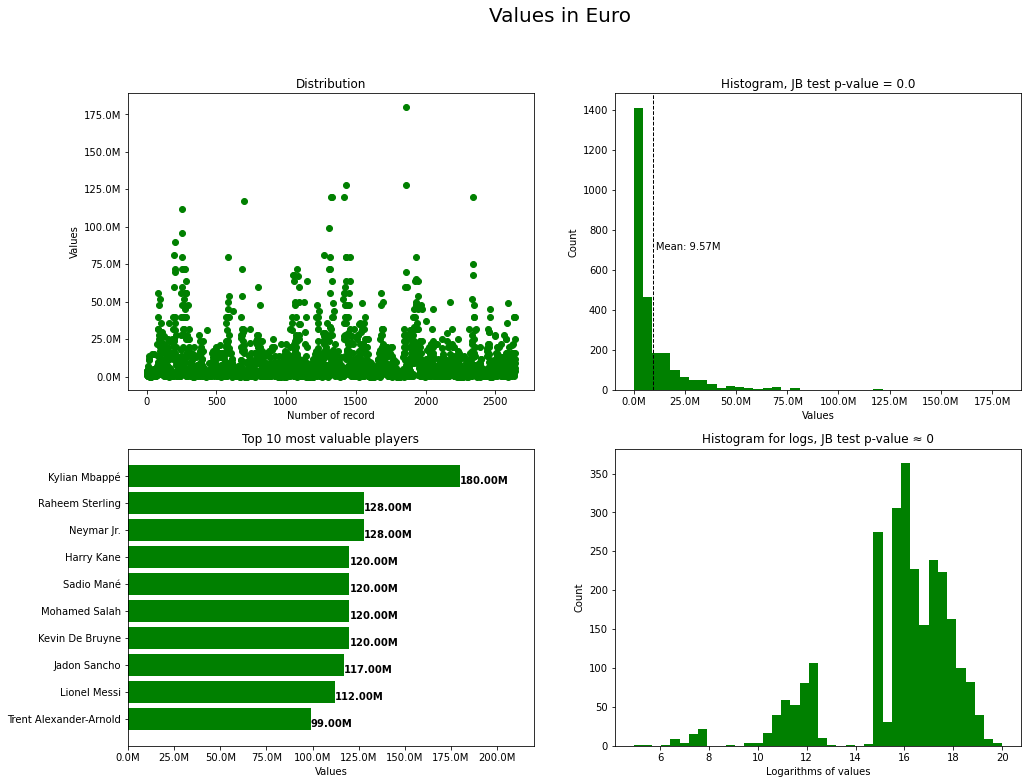

In [4]:
#printing values
values=data["value"]
avgvalue=statistics.mean(values)
values=values.astype(np.int64)
lnvalues=ln(values)
formatter = mpl.ticker.FuncFormatter(millions)
dataplot=data.sort_values('value',ascending=False)[0:10]
dataplot=dataplot.sort_values('value',ascending=True)
dataplot['player']=['Trent Alexander-Arnold','Lionel Messi','Jadon Sancho', 'Kevin De Bruyne', 'Mohamed Salah', 'Sadio Mané', 'Harry Kane','Neymar Jr.','Raheem Sterling','Kylian Mbappé']

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Values in Euro', fontsize=20)

ax[0,0].scatter(data.index,data['value'], color='g')
ax[0,0].yaxis.set_major_formatter(formatter)
ax[0,0].set_xlabel('Number of record')
ax[0,0].set_ylabel('Values')
ax[0,0].set_title('Distribution')

ax[0,1].hist(values, bins=40, rwidth=2, color='g')
ax[0,1].xaxis.set_major_formatter(formatter)
ax[0,1].set_xlabel('Values')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Histogram, JB test p-value = 0.0')
ax[0,1].axvline(avgvalue, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[0,1].text(1400, 700, '       Mean: %1.2fM' % (avgvalue * 1e-6))

ax[1,0].barh(dataplot['player'],dataplot['value'],color='g')
ax[1,0].axis([0, 220000000,-1,10])
for i, v in enumerate(dataplot['value']):
    ax[1,0].text(v-100, i-0.3, '%1.2fM'% (v * 1e-6), color='black',fontweight='bold')
ax[1,0].xaxis.set_major_formatter(formatter)
ax[1,0].set_xlabel('Values')
ax[1,0].set_title('Top 10 most valuable players')

ax[1,1].hist(lnvalues, bins=40, rwidth=2, color='g')
ax[1,1].set_xlabel('Logarithms of values')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Histogram for logs, JB test p-value ≈ 0')

plt.show()


In [5]:
#data for further plots
age=data["age"]
age=age[age!=0]
avgage=statistics.mean(age)
height=data["height"]
height=height.astype(np.int64)
height=height[height!=0]
avgheight=statistics.mean(height)
dataRightLeg = data[data['foot']=='right']
dataLeftLeg = data[data['foot']=='left']
dataBothLeg = data[data['foot']=='both']
rightleg=len(dataRightLeg)
leftleg=len(dataLeftLeg)
bothleg=len(dataBothLeg)
legs=pd.DataFrame([rightleg,leftleg,bothleg])
legs.columns=['Amount']
legs.index=['right','left','both']
datanations=data.groupby('nationality').count()
datanations=datanations['ď»żColumn1']
datanations=datanations.sort_values(ascending=False)
datanations=datanations[0:20]
datanations=datanations.sort_values(ascending=True)
datanations=pd.DataFrame(datanations)
ytest1=datanations['ď»żColumn1']
xtest1=datanations.index
xtest1=['Nigeria','Ghana','Poland','Switzerland','Denmark','Serbia','Uruguay','Ivory Coast','Senegal','Austria',
        'Belgium','Portugal','Netherlands','Argentine','Brazil','England','Germany','Italy','France','Spain']
dataleagues=data.groupby('league').count()
dataleagues=dataleagues['ď»żColumn1']
dataleagues=dataleagues.sort_values(ascending=False)
dataleagues=dataleagues[0:5]
dataleagues=dataleagues.sort_values(ascending=True)
dataleagues=pd.DataFrame(dataleagues)
ytest2=dataleagues['ď»żColumn1']
xtest2=dataleagues.index
dataLaLiga=data[data['league']=='La Liga']
dataPremierLeague=data[data['league']=='Premier League']
dataSerieA=data[data['league']=='Serie A']
dataLigue1=data[data['league']=='Ligue 1']
dataBundesliga=data[data['league']=='Bundesliga']
dataLaLiga=dataLaLiga[dataLaLiga['nationality']!='es ESP']
dataPremierLeague=dataPremierLeague[dataPremierLeague['nationality']!='eng ENG']
dataSerieA=dataSerieA[dataSerieA['nationality']!='it ITA']
dataLigue1=dataLigue1[dataLigue1['nationality']!='fr FRA']
dataBundesliga=dataBundesliga[dataBundesliga['nationality']!='de GER']
dataleaguesnations=dataLaLiga.append([dataPremierLeague,dataSerieA,dataLigue1,dataBundesliga])
datanations1=dataleaguesnations.groupby('nationality').count()
datanations1=datanations1['ď»żColumn1']
datanations1=datanations1.sort_values(ascending=False)
datanations1=datanations1[0:20]
datanations1=datanations1.sort_values(ascending=True)
datanations1=pd.DataFrame(datanations1)
ytest3=datanations1['ď»żColumn1']
xtest3=datanations1.index
xtest3=['Morocco','Columbia','Croatia','Nigeria','Poland','Switzerland','Denmark','Germany','Serbia','Uruguay','Ivory Coast','Senegal','Austria',
        'Belgium','Portugal','Netherlands','Spain','Argentine','France','Brazil']
dataGK = data[data['position2']=='Goalkeeper']
GKvalues=dataGK["value"]
GKvalues=GKvalues.astype(np.int64)
GKage=dataGK["age"]
GKheight=dataGK["height"]
GKheight=GKheight.astype(np.int64)
GKheight=GKheight[GKheight!=0]
avgGKvalue=statistics.mean(GKvalues)
avgGKage=statistics.mean(GKage)
avgGKheight=statistics.mean(GKheight)
dataDEF = data[data['position2'].str[:8]=='Defender']
DEFvalues=dataDEF["value"]
DEFage=dataDEF["age"]
DEFheight=dataDEF["height"]
DEFheight=DEFheight.astype(np.int64)
DEFheight=DEFheight[DEFheight!=0]
avgDEFvalue=statistics.mean(DEFvalues)
avgDEFage=statistics.mean(DEFage)
avgDEFheight=statistics.mean(DEFheight)
dataMID = data[data['position2'].str[:10]=='Midfielder']
MIDvalues=dataMID["value"]
MIDage=dataMID["age"]
MIDheight=dataMID["height"]
MIDheight=MIDheight.astype(np.int64)
MIDheight=MIDheight[MIDheight!=0]
avgMIDvalue=statistics.mean(MIDvalues)
avgMIDage=statistics.mean(MIDage)
avgMIDheight=statistics.mean(MIDheight)
dataFWD = data[data['position2'].str[:7]=='Forward']
FWDvalues=dataFWD["value"]
FWDage=dataFWD["age"]
FWDheight=dataFWD["height"]
FWDheight=FWDheight.astype(np.int64)
FWDheight=FWDheight[FWDheight!=0]
avgFWDvalue=statistics.mean(FWDvalues)
avgFWDage=statistics.mean(FWDage)
avgFWDheight=statistics.mean(FWDheight)
vectorGK=np.array([avgGKvalue,avgGKage,avgGKheight])
vectorDEF=np.array([avgDEFvalue,avgDEFage,avgDEFheight])
vectorMID=np.array([avgMIDvalue,avgMIDage,avgMIDheight])
vectorFWD=np.array([avgFWDvalue,avgFWDage,avgFWDheight])
overviewforpositions=pd.DataFrame([vectorGK,vectorDEF,vectorMID,vectorFWD])
overviewforpositions.columns=['value','age','height']
overviewforpositions.index=['Goalkeepers','Defenders','Midfielders','Forwards']
xtest = overviewforpositions.index
ytest = overviewforpositions["value"]
yytest = overviewforpositions["age"]
yyytest = overviewforpositions["height"]
dataagevalue=data[data["age"]!=0]
dataLaLiga=data[data['league']=='La Liga']
dataPremierLeague=data[data['league']=='Premier League']
dataSerieA=data[data['league']=='Serie A']
dataLigue1=data[data['league']=='Ligue 1']
dataBundesliga=data[data['league']=='Bundesliga']
valueBundesliga=statistics.mean(dataBundesliga['value'])
valueLaLiga=statistics.mean(dataLaLiga['value'])
valuePremierLeague=statistics.mean(dataPremierLeague['value'])
valueLigue1=statistics.mean(dataLigue1['value'])
valueSerieA=statistics.mean(dataSerieA['value'])
ligi=['Premier League','La Liga','Bundesliga','Serie A','Ligue 1']
valuesleagues=[valuePremierLeague, valueLaLiga, valueBundesliga, valueSerieA, valueLigue1]
dataSpain=dataleaguesnations[dataleaguesnations['nationality']=='es ESP']
dataFrance=dataleaguesnations[dataleaguesnations['nationality']=='fr FRA']
dataGermany=dataleaguesnations[dataleaguesnations['nationality']=='de GER']
dataItaly=dataleaguesnations[dataleaguesnations['nationality']=='it ITA']
dataEngland=dataleaguesnations[dataleaguesnations['nationality']=='eng ENG']
dataBrazil=data[data['nationality']=='br BRA']
dataArgentine=data[data['nationality']=='ar ARG']
dataNetherlands=data[data['nationality']=='nl NED']
dataPortugal=data[data['nationality']=='pt POR']
dataBelgium=data[data['nationality']=='be BEL']
dataPoland=data[data['nationality']=='pl POL']
dataCroatia=data[data['nationality']=='hr CRO']
dataSenegal=data[data['nationality']=='sn SEN']
dataJapan=data[data['nationality']=='jp JPN']
dataUruguay=data[data['nationality']=='uy URU']
dataUSA=data[data['nationality']=='us USA']
valueSpain=int(statistics.mean(dataSpain['value']))
valueFrance=int(statistics.mean(dataFrance['value']))
valueGermany=int(statistics.mean(dataGermany['value']))
valueItaly=int(statistics.mean(dataItaly['value']))
valueEngland=int(statistics.mean(dataEngland['value']))
valueBrazil=int(statistics.mean(dataBrazil['value']))
valueArgentine=int(statistics.mean(dataArgentine['value']))
valueNetherlands=int(statistics.mean(dataNetherlands['value']))
valuePortugal=int(statistics.mean(dataPortugal['value']))
valueBelgium=int(statistics.mean(dataBelgium['value']))
valueCroatia=int(statistics.mean(dataCroatia['value']))
valuePoland=int(statistics.mean(dataPoland['value']))
valueSenegal=int(statistics.mean(dataSenegal['value']))
valueJapan=int(statistics.mean(dataJapan['value']))
valueUruguay=int(statistics.mean(dataUruguay['value']))
valueUSA=int(statistics.mean(dataUSA['value']))
kraje=['Spain','France','Germany','Italy','England','Brazil','Argentine','Netherlands','Portugal','Belgium', 'Croatia', 'Uruguay', 'Senegal','USA','Japan','Poland']
valuesnations=(valueSpain,valueFrance,valueGermany,valueItaly,valueEngland,valueBrazil,valueArgentine,valueNetherlands,valuePortugal,valueBelgium, valueCroatia, valueUruguay, valueSenegal, valueUSA, valueJapan, valuePoland)
lecimy=np.corrcoef(dataagevalue['age'],dataagevalue['value'])
lecimy=lecimy[0,1]*2

<ipython-input-6-74d600b60628>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(['GK','DEF','MID','FWD'])
<ipython-input-6-74d600b60628>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2,1].set_xticklabels(['GK','DEF','MID','FWD'])
<ipython-input-6-74d600b60628>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3,1].set_xticklabels(xtest, Rotation=90)
<ipython-input-6-74d600b60628>:90: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax[3,1].set_xticklabels(xtest, Rotation=90)
<ipython-input-6-74d600b60628>:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3,2].set_xticklabels(ligi, Rotation=90)
<ipython-input-6-74d600b60628>:106: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two 

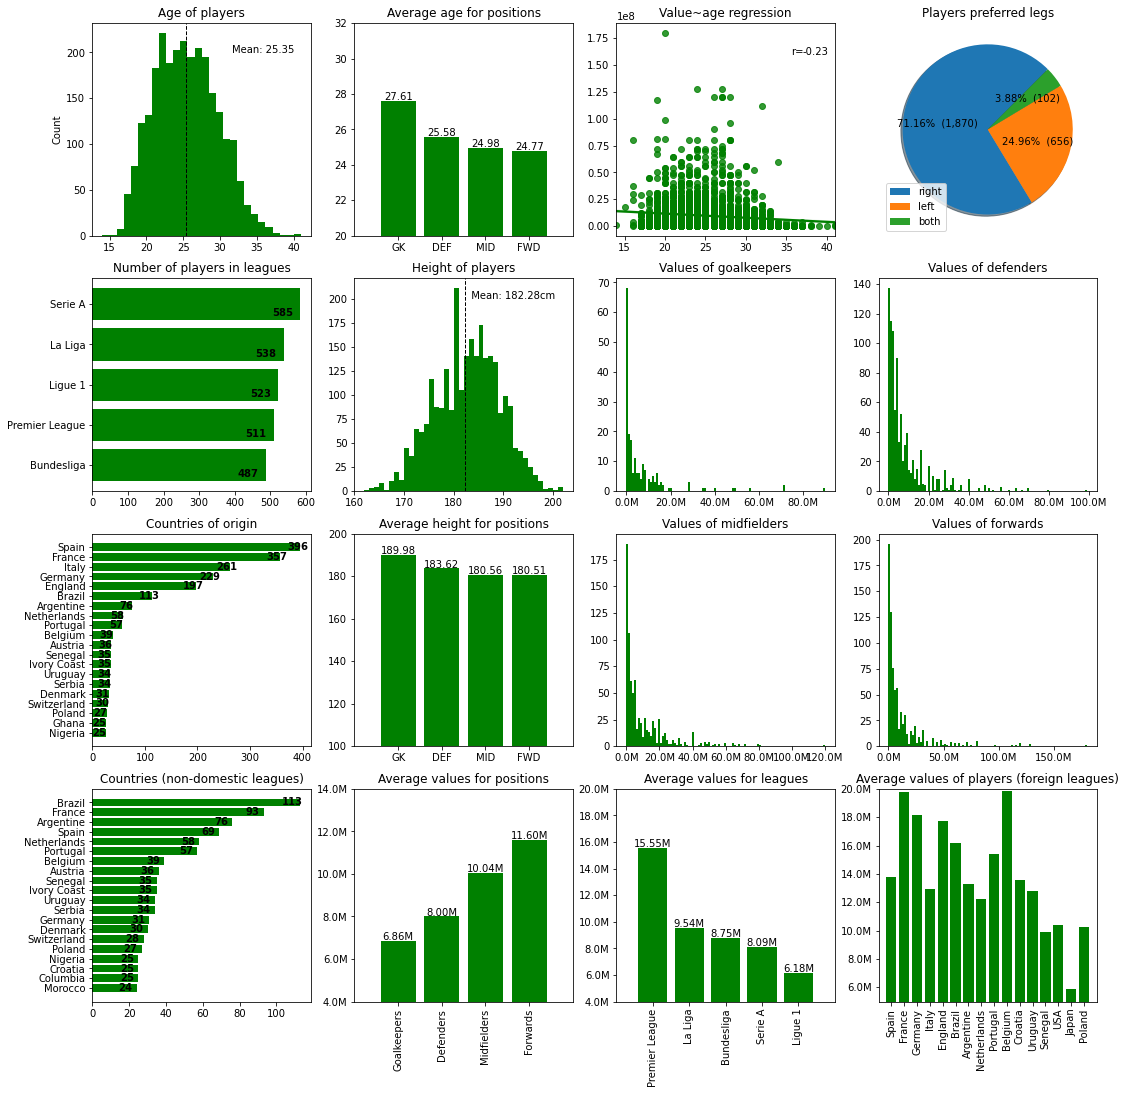

In [6]:
formatter = mpl.ticker.FuncFormatter(millions)

fig, ax = plt.subplots(4, 4, figsize=(18, 18))

ax[0,0].hist(age,bins=28, rwidth=2, color='g')
ax[0,0].set_title('Age of players')
ax[0,0].set_ylabel('Count')
ax[0,0].axvline(avgage, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax[0,0].text(avgage*1.25, 200, 'Mean: %1.2f' % avgage)

sns.regplot(ax=ax[0,2],x="age",y="value",data=dataagevalue,color='g')
ax[0,2].set_title('Value~age regression')
ax[0,2].set_ylabel('')
ax[0,2].set_xlabel('')
ax[0,2].annotate("r=",xy=(0.8,0.85), xycoords="axes fraction")
ax[0,2].annotate("{:.2f}".format(lecimy),xy=(0.85,0.85), xycoords="axes fraction")

ax[0,1].bar(xtest,yytest,color='g')
ax[0,1].set_title('Average age for positions')
ax[0,1].set_xticklabels(['GK','DEF','MID','FWD'])
ax[0,1].axis([-1, 4,20,32])
for x,y in zip(xtest,yytest):

    label = "{:.2f}".format(y)

    ax[0,1].annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')
    
ax[2,1].bar(xtest,yyytest,color='g')
ax[2,1].set_title('Average height for positions')
ax[2,1].set_xticklabels(['GK','DEF','MID','FWD'])
ax[2,1].axis([-1, 4,100,200])
for x,y in zip(xtest,yyytest):

    label = "{:.2f}".format(y)

    ax[2,1].annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')

ax[1,1].hist(height,bins=40, rwidth=2, color='g')
ax[1,1].set_title('Height of players')
ax[1,1].axvline(avgheight, color='k', linestyle='dashed', linewidth=1)
ax[1,1].text(avgheight*1, 200, '  Mean: %1.2f' % avgheight + 'cm')

ax[0,3].pie(legs['Amount'],autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(legs['Amount'])/100),
    shadow=True, startangle=45)
ax[0,3].set_title('Players preferred legs')
ax[0,3].legend(labels=legs.index,loc="lower left")

ax[1,0].barh(xtest2,ytest2,  color='g')
for i, v in enumerate(ytest2):
    ax[1,0].text(v-80, i-0.3, str(v), color='black', fontweight='bold')
ax[1,0].set_title('Number of players in leagues')

ax[1,2].hist(GKvalues,bins=100, rwidth=2, color='g')
ax[1,2].set_title('Values of goalkeepers')
ax[1,2].xaxis.set_major_formatter(formatter)

ax[1,3].hist(DEFvalues,bins=100, rwidth=2, color='g')
ax[1,3].set_title('Values of defenders')
ax[1,3].xaxis.set_major_formatter(formatter)

ax[2,2].hist(MIDvalues,bins=100, rwidth=2, color='g')
ax[2,2].set_title('Values of midfielders')
ax[2,2].xaxis.set_major_formatter(formatter)

ax[2,3].hist(FWDvalues,bins=100, rwidth=2, color='g')
ax[2,3].set_title('Values of forwards')
ax[2,3].xaxis.set_major_formatter(formatter)

ax[2,0].barh(xtest1,ytest1,  color='g')
for i, v in enumerate(ytest1):
    ax[2,0].text(v-25, i-0.3, str(v), color='black', fontweight='bold')
ax[2,0].set_title('Countries of origin')

ax[3,0].barh(xtest3,ytest3,  color='g')
for i, v in enumerate(ytest3):
    ax[3,0].text(v-10, i-0.3, str(v), color='black', fontweight='bold')
ax[3,0].set_title('Countries (non-domestic leagues)')

ax[3,1].bar(xtest,ytest, color='g')
ax[3,1].set_title('Average values for positions')
ax[3,1].set_xticklabels(xtest, Rotation=90)
ax[3,1].yaxis.set_major_formatter(formatter)
ax[3,1].axis([-1, 4,4000000,14000000])

for x,y in zip(xtest,ytest):

    label = "{:.2f}M".format(y*1e-6)

    ax[3,1].annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')
    
ax[3,2].bar(ligi,valuesleagues, color='g')
ax[3,2].set_title('Average values for leagues')
ax[3,2].set_xticklabels(ligi, Rotation=90)
ax[3,2].yaxis.set_major_formatter(formatter)
ax[3,2].axis([-1, 5,4000000,20000000])
for x,y in zip(ligi,valuesleagues):

    label = "{:.2f}M".format(y*1e-6)

    ax[3,2].annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,1),
                 ha='center')    
    
ax[3,3].bar(kraje,valuesnations, color='g')
ax[3,3].set_title('Average values of players (foreign leagues)')
ax[3,3].set_xticklabels(kraje, Rotation=90)
ax[3,3].yaxis.set_major_formatter(formatter)
ax[3,3].axis([-1, 16,5000000,20000000])

plt.show()

In [7]:
jbtest1=sm.stats.stattools.jarque_bera(data['value'])
jbtest2=sm.stats.stattools.jarque_bera(np.log(data['value']))
jbtest3=sm.stats.stattools.jarque_bera(height)
testowanejest0=dataagevalue[dataagevalue['age']>26]
np.corrcoef(testowanejest0['age'],testowanejest0['value'])
jbtest3

(20.80961861748684,
 3.0286475181569712e-05,
 -0.13748193020515392,
 2.662354984160897)

In [8]:
dataDEFcb=data[data['position2']=='Defender - Centre-Back']
dataDEFcb2=dataDEFcb[dataDEFcb['height']>statistics.mean(height)]
heightcb=dataDEFcb['height']
heightcb2=dataDEFcb2['height']
1-len(heightcb2)/len(heightcb)

0.1071428571428571

In [9]:
dataGK2=dataGK[dataGK['height']>statistics.mean(height)]
heightGK=dataGK['height']
heightGK2=dataGK2['height']
1-len(heightGK2)/len(heightGK)

0.04102564102564099

Text(27.0, 0.5, 'Value in 100 millions euro')

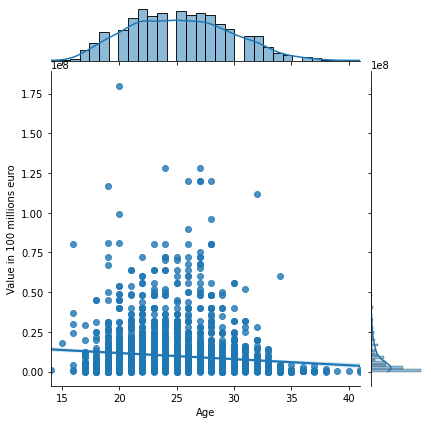

In [10]:
sns.jointplot(x="age",y="value",data=dataagevalue,kind="reg")
plt.xlabel('Age')
plt.ylabel('Value in 100 millions euro')